In [1]:
import pandas as pd
import numpy as np
from pathlib import Path


In [2]:
valid_after = 1000
valid_iters = 1000

In [3]:
current_path = str(Path.cwd()).split("/")
dataset = current_path[-4]
domain_type = "-".join(current_path[-5].split("_")[:-1])
model = current_path[-2].split("_")[0]
info_str = f"Model: {model}, Domain-Type: {domain_type}, Dataset: {dataset}"


In [4]:
training_loss_acc = pd.read_csv("experiment_results_train.csv")
valid_loss_acc = pd.read_csv("experiment_results_validation.csv")[:-valid_iters]

In [5]:
training_loss_acc["running_loss_training"] = training_loss_acc["Loss"].rolling(100).mean()
training_loss_acc["running_acc_training"] = training_loss_acc["Accuracy"].rolling(100).mean()
training_loss_acc["iteration"] = training_loss_acc.index
training_loss_acc = training_loss_acc.rename(columns={"Accuracy": "raw_acc_training",
                                "Loss": "raw_loss_training"})#.drop(["Accuracy", "Loss"], axis=1)

training_loss_acc["epoch"] = np.ceil((training_loss_acc.index+0.000001) / valid_after).astype(int)
training_loss_acc

,raw_acc_training,raw_loss_training,running_loss_training,running_acc_training,iteration,epoch
0,0.0000,6.903295,NaN,NaN,0,1
1,0.0000,6.709687,NaN,NaN,1,1
2,0.0000,7.155130,NaN,NaN,2,1
3,0.0000,6.868250,NaN,NaN,3,1
4,0.0000,6.765361,NaN,NaN,4,1
...,...,...,...,...,...,...
9995,0.5000,1.890176,2.354383,0.408125,9995,10
9996,0.5000,2.355881,2.348238,0.409375,9996,10
9997,0.4375,2.451374,2.354846,0.408750,9997,10
9998,0.6875,1.669011,2.348490,0.412500,9998,10


In [6]:
valid_loss_acc["epoch"]  = np.ceil((valid_loss_acc.index+0.000001) / valid_iters).astype(int)

valid_per_epoch = valid_loss_acc.groupby("epoch", as_index=False).mean().rename(columns={"Accuracy": "running_acc_validation",
                                "Loss": "running_loss_validation"})

epochs_df = training_loss_acc.merge(valid_per_epoch, on="epoch").set_index("iteration")[1:]

valid_per_epoch


,epoch,running_acc_validation,running_loss_validation
0,1,0.245650,1.636012
1,2,0.320688,1.505928
2,3,0.382175,1.429124
3,4,0.420563,1.376432
4,5,0.440375,1.343144


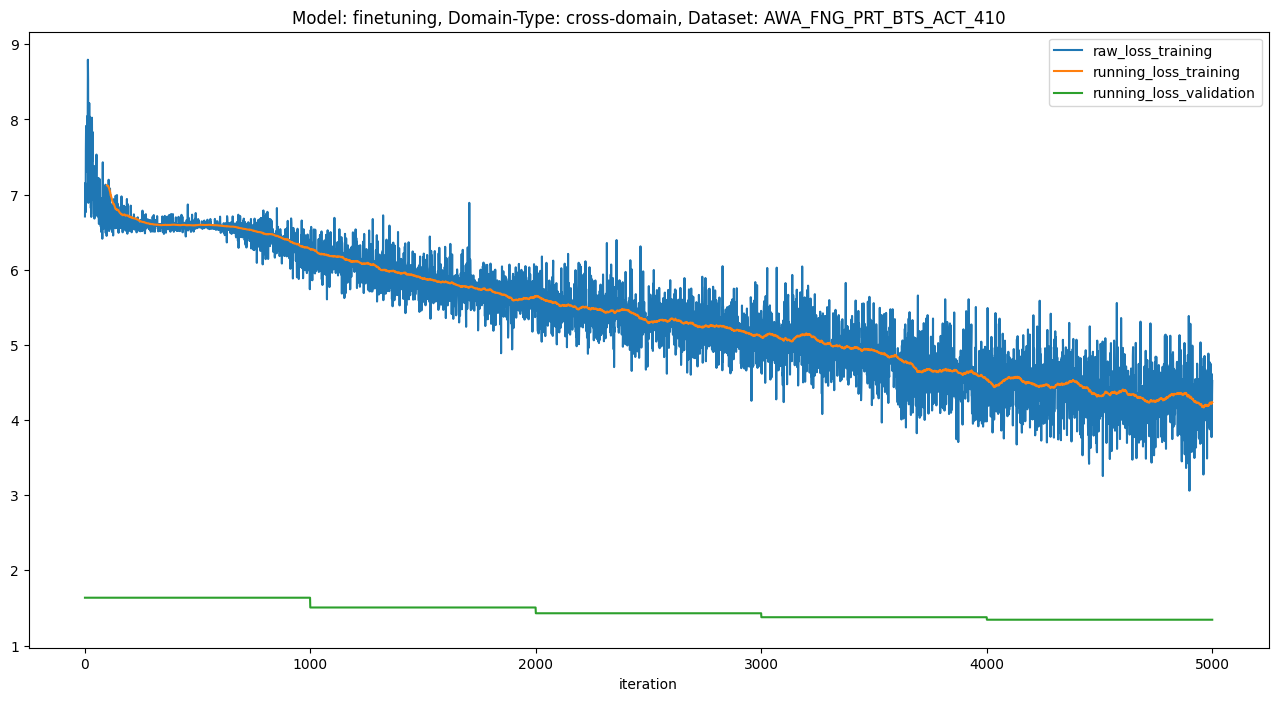

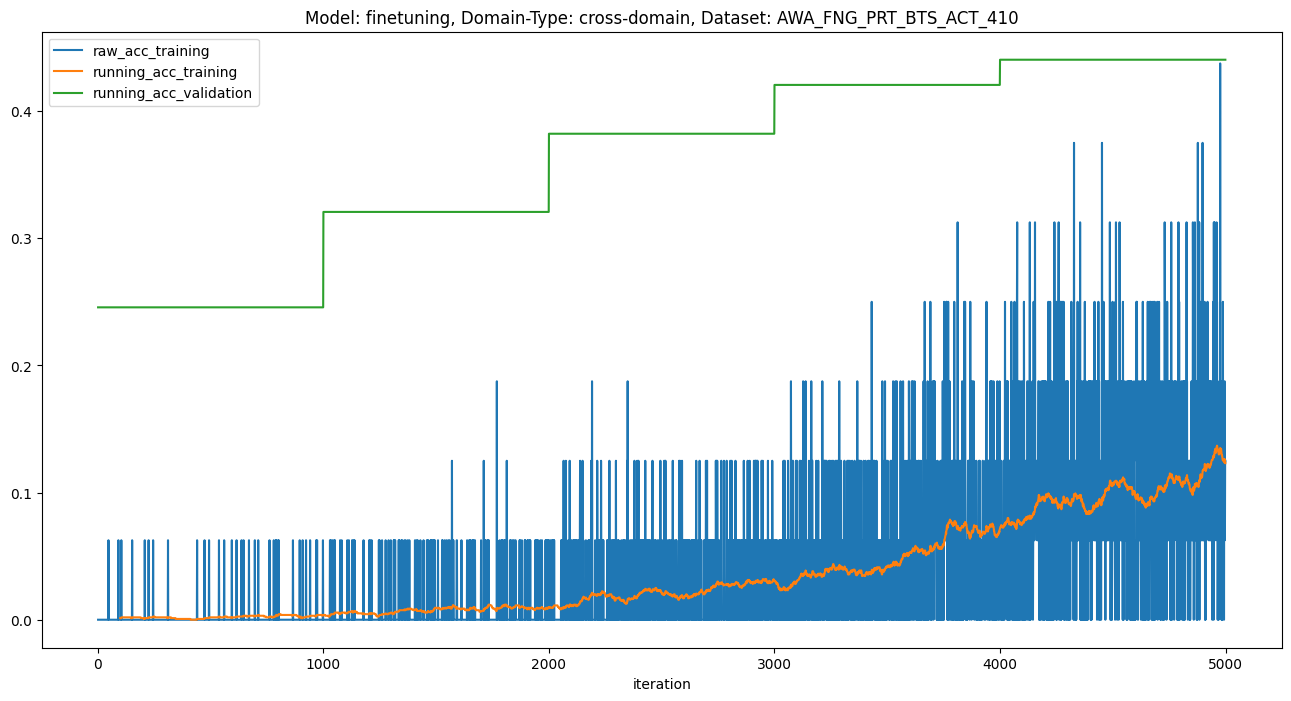

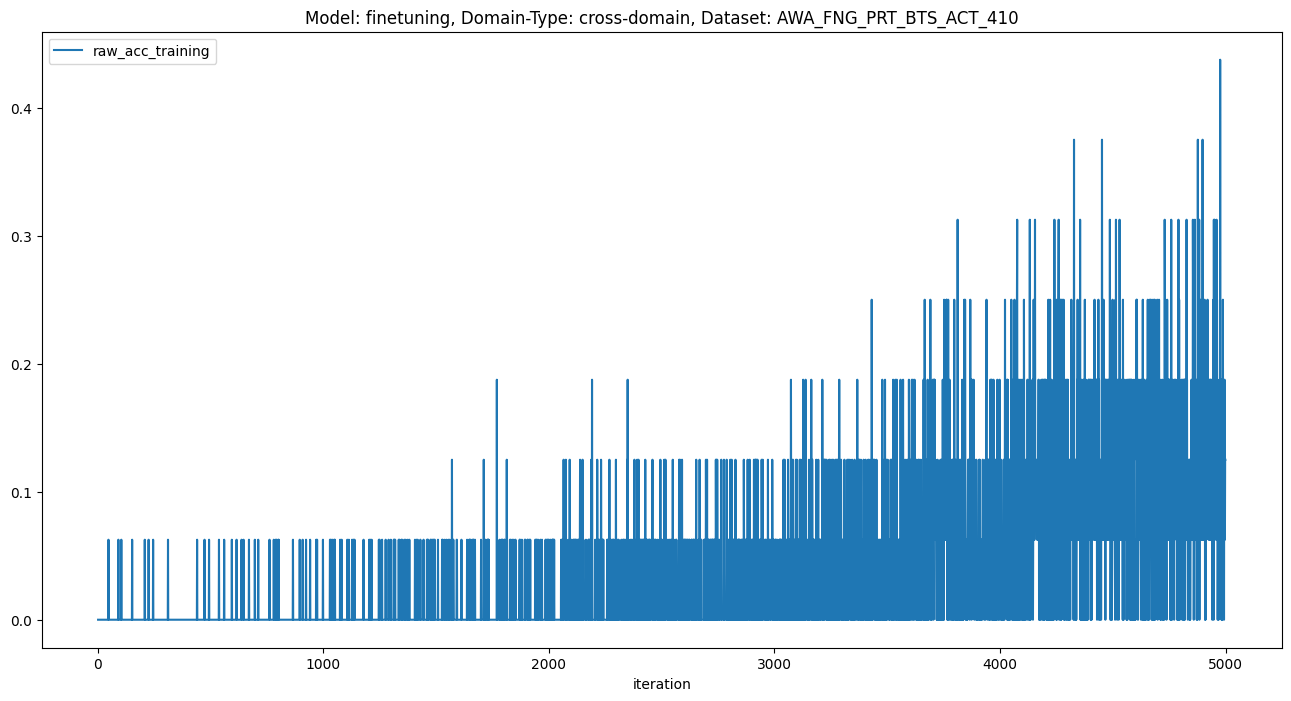

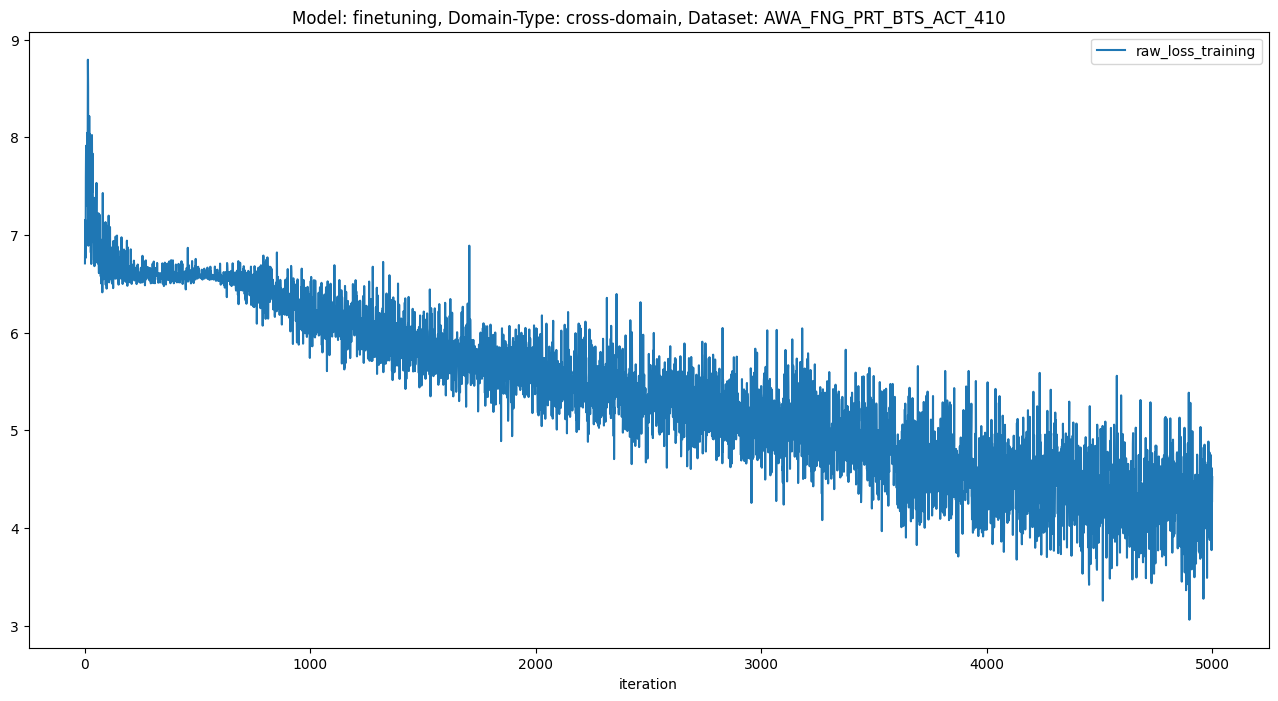

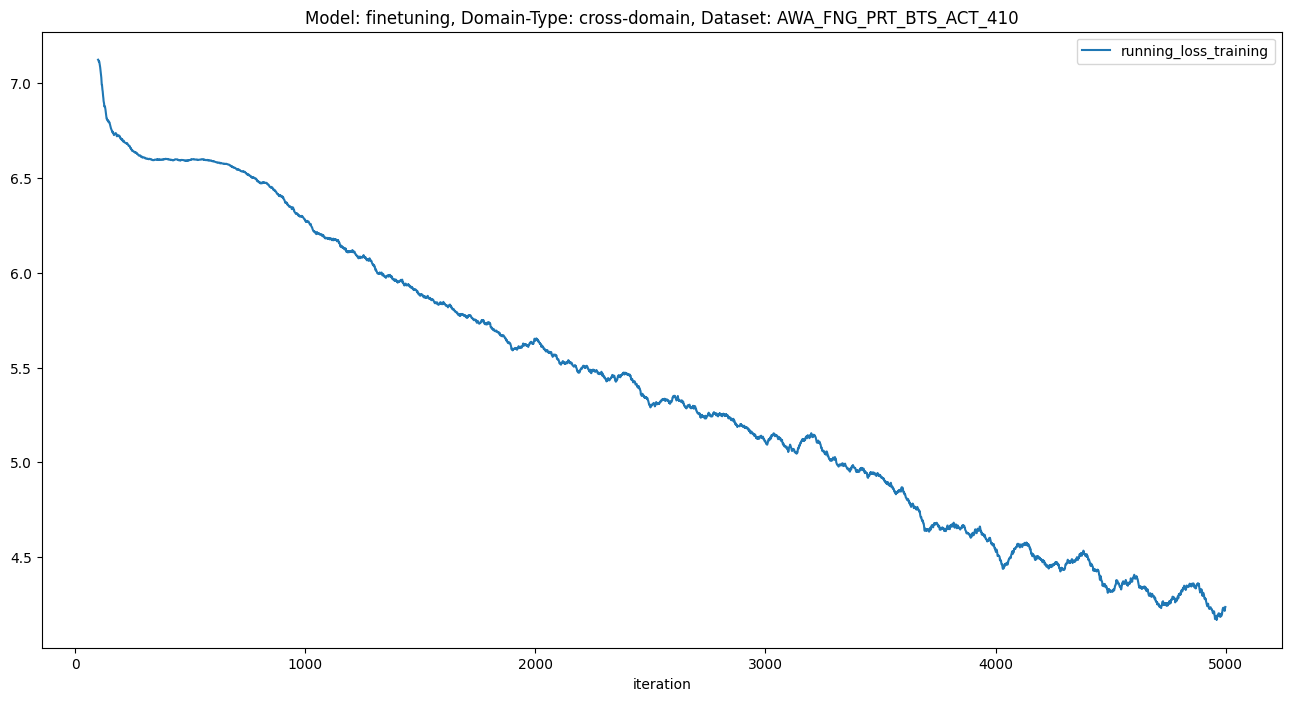

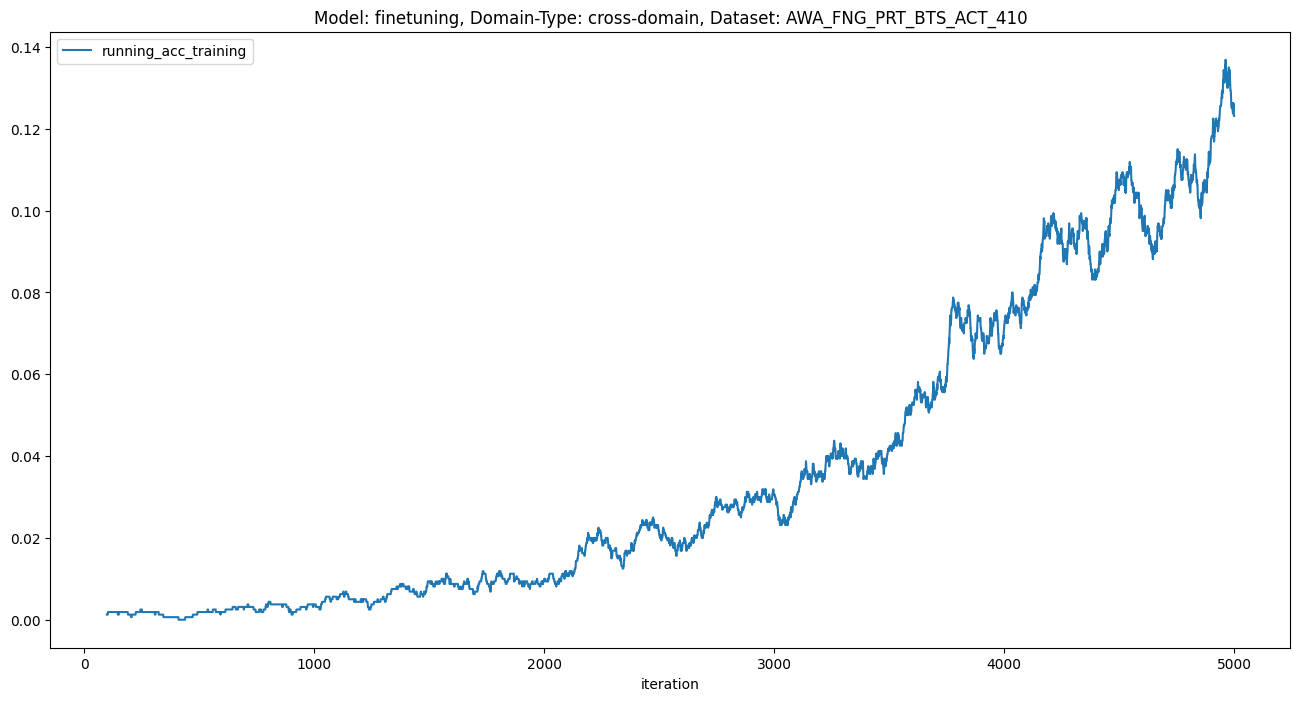

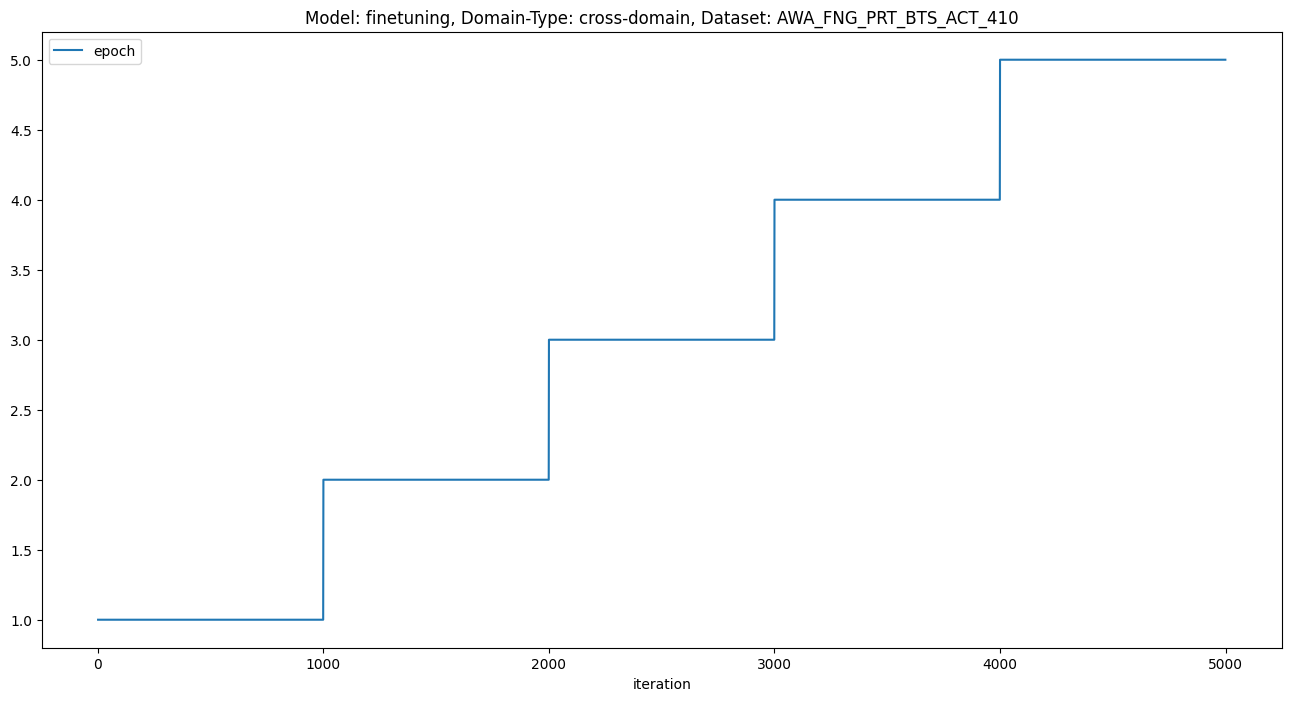

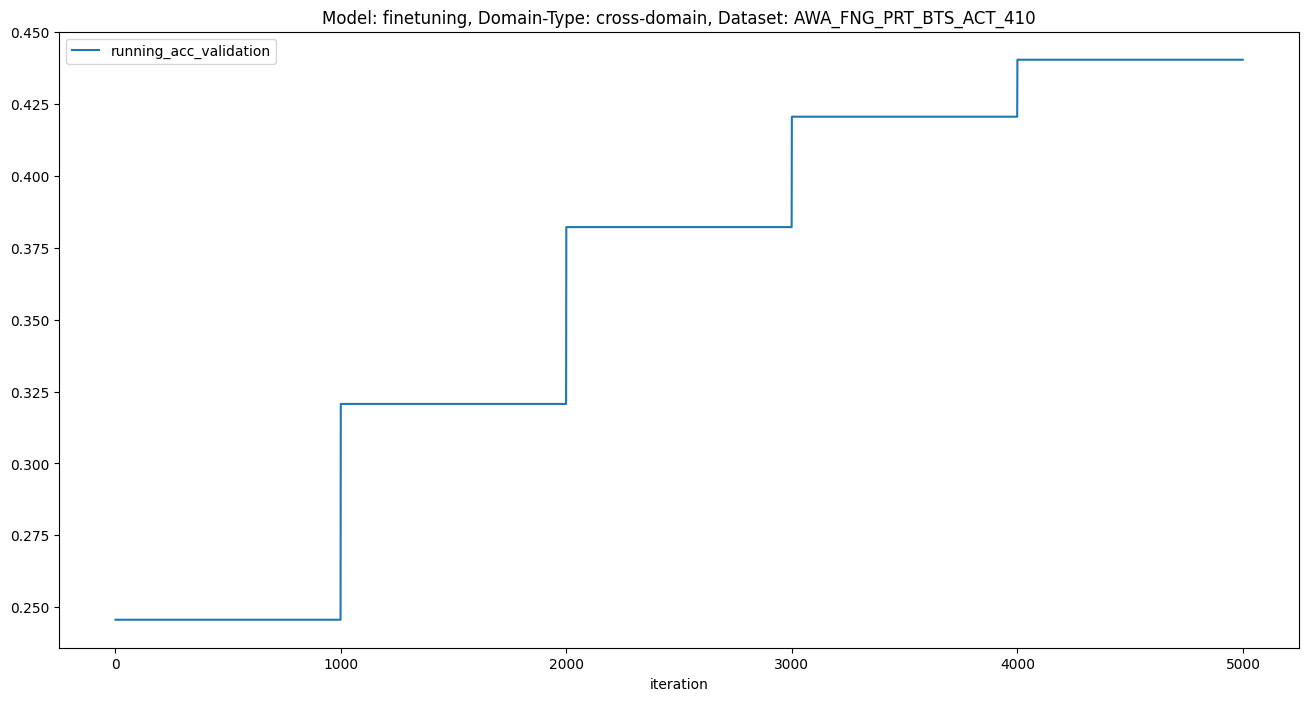

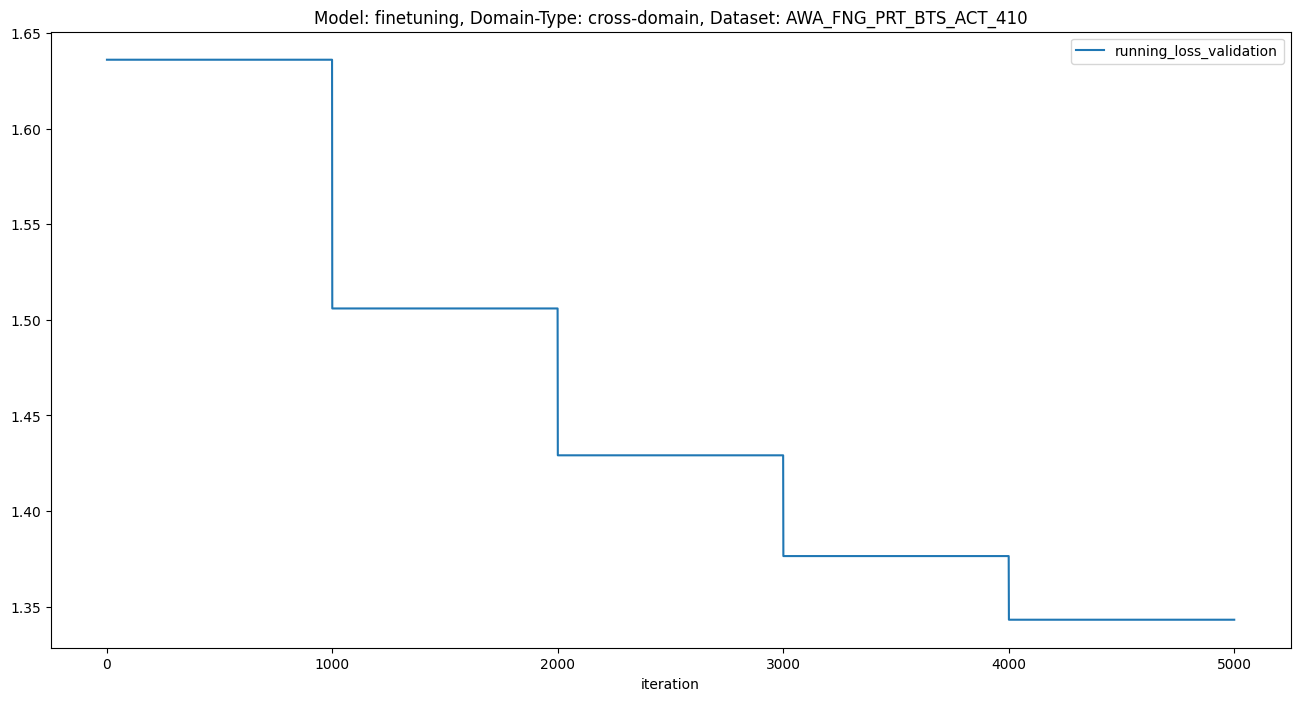

In [7]:
for type in ["loss", "acc"] + list(epochs_df.columns): 
    epochs_df[[col for col in epochs_df.columns if type in col]].plot(figsize=(16, 8), title=info_str)